In [22]:
import pandas as pd
import matplotlib.pyplot as plt

## Lecture du Csv, et affichage des 10 premières lignes

In [23]:
CSV_PATH = 'CSV/FAO.csv'
df = pd.read_csv(CSV_PATH, encoding='ISO-8859-1')
df.head(10)


,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
5,AFG,2,Afghanistan,2514,Maize and products,5142,Food,1000 tonnes,33.94,67.71,...,231.0,67.0,82.0,67.0,69.0,71.0,82.0,73.0,77,76
6,AFG,2,Afghanistan,2517,Millet and products,5142,Food,1000 tonnes,33.94,67.71,...,15.0,21.0,11.0,19.0,21.0,18.0,14.0,14.0,14,12
7,AFG,2,Afghanistan,2520,"Cereals, Other",5142,Food,1000 tonnes,33.94,67.71,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
8,AFG,2,Afghanistan,2531,Potatoes and products,5142,Food,1000 tonnes,33.94,67.71,...,276.0,294.0,294.0,260.0,242.0,250.0,192.0,169.0,196,230
9,AFG,2,Afghanistan,2536,Sugar cane,5521,Feed,1000 tonnes,33.94,67.71,...,50.0,29.0,61.0,65.0,54.0,114.0,83.0,83.0,69,81


## Informations du CSV:
- Valeurs manquantes / nulls,
- Valeurs présentes / non nulls,
- Valeurs présentes / total.

In [24]:
df.info()
isNull = df.isnull().sum()
for i in range(len(isNull)):
    if isNull[i] > 0:
        print(df.columns[i], isNull[i])
totalNotNull = df.notnull().sum().sum()
totalNull = df.isnull().sum().sum()
totalValue = totalNotNull + totalNull
print("Total value: ", totalValue)
print("Total not null value: ", totalNotNull)
print("Total null value: ", totalNull)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              17938 non-null  float64
 11  Y1962              17938 non-null  float64
 12  Y1963              17938 non-null  float64
 13  Y1964              17938 non-null  float64
 14  Y1965              17938 non-null  float64
 15  Y1966              17938 non-null  float64
 16  Y1967              179

C:\Users\x_mat\AppData\Local\Temp\ipykernel_2468\2406370487.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isNull[i] > 0:
C:\Users\x_mat\AppData\Local\Temp\ipykernel_2468\2406370487.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df.columns[i], isNull[i])


## Type de données par colonne:
- Qualitative,
- Quantitative discrète,
- Quantitative continue.

In [25]:
df.rename(columns=lambda x: x.replace('Y', ''), inplace=True)
print(df.dtypes)

Area Abbreviation     object
Area Code              int64
Area                  object
Item Code              int64
Item                  object
                      ...   
2009                 float64
2010                 float64
2011                 float64
2012                   int64
2013                   int64
Length: 63, dtype: object


Les colonnes "Y2012" et "Y2013" sont en int64, alors que les autres sont en float64.
On va donc faire des une conversion de type de données pour ces deux colonnes afin de garder une certaine cohérence.

In [26]:
Qualitative = []
Discrete = []
Continue = []
df['2012'] = df['2012'].astype('float64')
df['2013'] = df['2013'].astype('float64')
for i in range(len(df.dtypes)):
    if df.dtypes.iloc[i] == 'object':
        Qualitative.append(df.columns[i])
    if df.dtypes.iloc[i] == 'int64':
        Discrete.append(df.columns[i])
    if df.dtypes.iloc[i] == 'float64':
        Continue.append(df.columns[i])

print("Qualitative: ", Qualitative)
print("Discrete: ", Discrete)
print("Continue: ", Continue)

Qualitative:  ['Area Abbreviation', 'Area', 'Item', 'Element', 'Unit']
Discrete:  ['Area Code', 'Item Code', 'Element Code']
Continue:  ['latitude', 'longitude', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


Chaque donnée qualitative est de nature Nominal, car elle ne permettent pas de ranger les données dans un ordre précis.

Les données discrètes sont des valeurs fixes définient, elle n'appartiennent pas à un intervalle de valeurs.

Les données continues sont des valeurs qui peuvent prendre n'importe quelle valeur dans un intervalle donné, elles servent de mesure d'unités de nourriture produite ou consommé dans notre cas.

## Classement des pays plus gros producteurs/consommateurs par produits:
- Production destiné à l'Homme = Food,
- Production destiné au bétail = Feed.

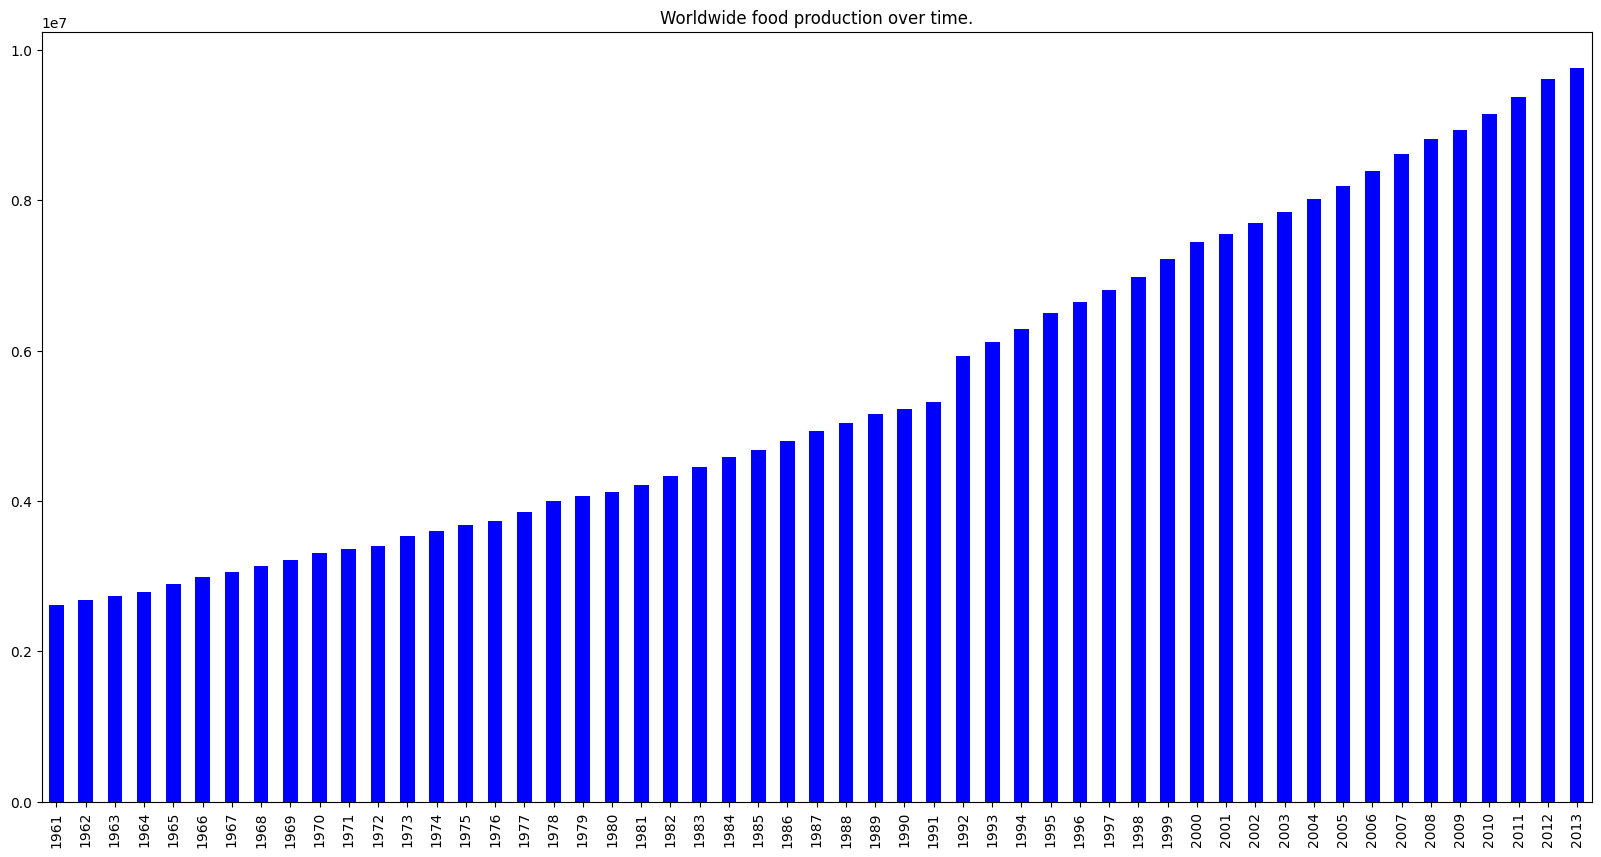

In [27]:
Year = []
Food = df.loc[df['Element'] == 'Food']
for i in range(1961, 2014):
    Year.append(str(i))
Food = Food[Year]
Food = Food.sum()
Food = Food.sort_values(ascending=True)
Food.plot(kind='bar', figsize=(20, 10), title="Worldwide food production over time.", color='blue')
plt.show()

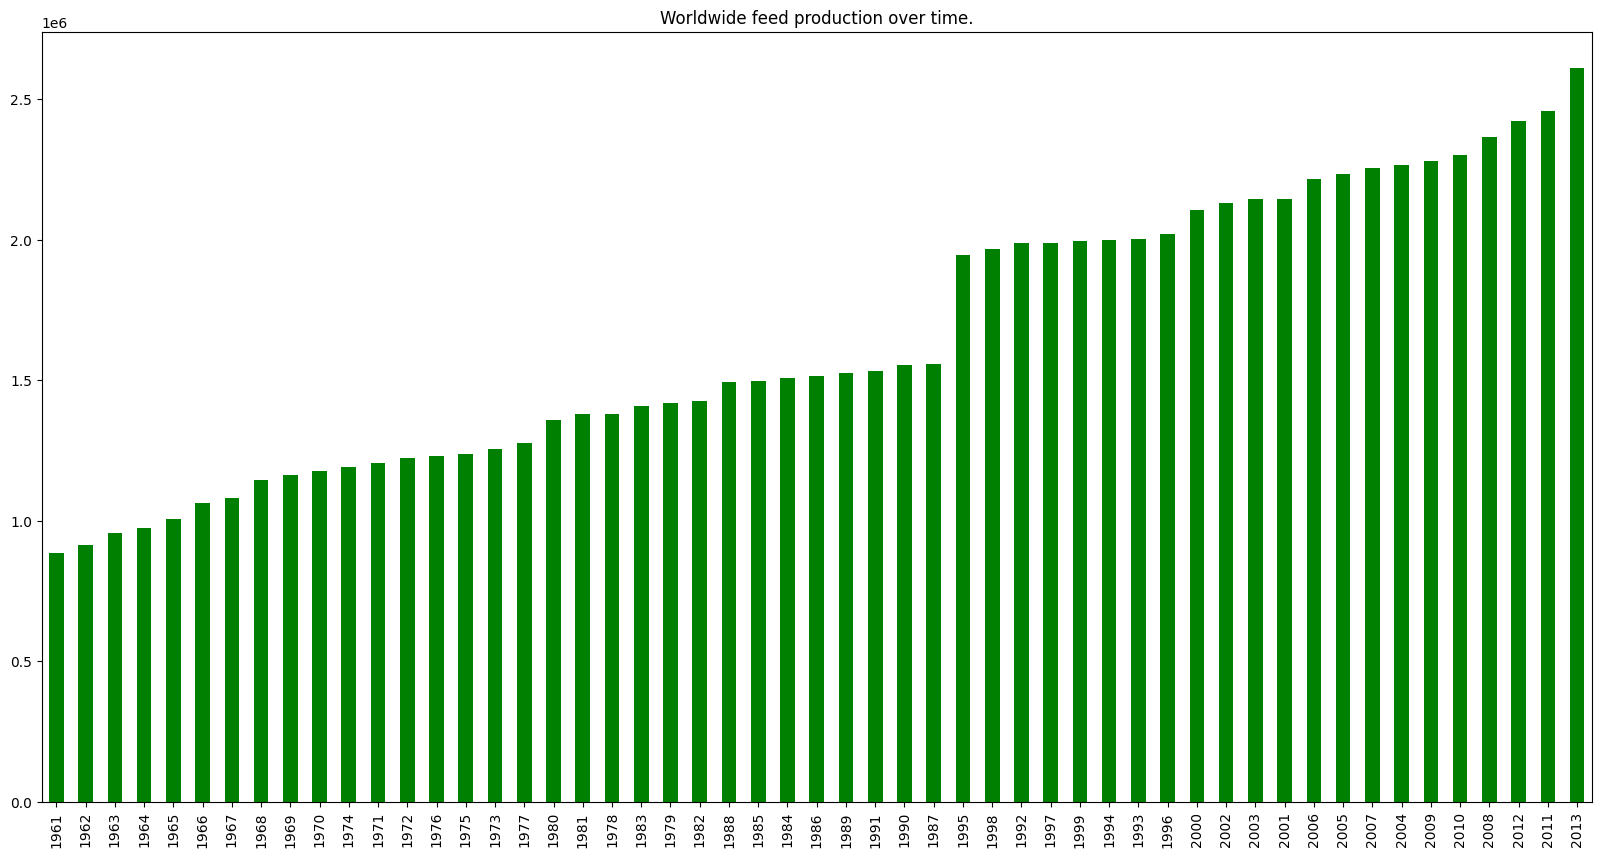

In [28]:
Feed = df.loc[df['Element'] == 'Feed']
Feed = Feed[Year]
Feed = Feed.sum()
Feed = Feed.sort_values(ascending=True)
Feed.plot(kind='bar', figsize=(20, 10), title="Worldwide feed production over time.", color='green')
plt.show()

In [29]:
#Pivot des données sur les années avec la méthode melt
df = pd.melt(df, id_vars=['Area', 'Item', 'Element', 'Unit'], value_vars=Year)
df = df.rename(columns={'variable': 'Year', 'value': 'Poduction'})
df.head(10)

,Area,Item,Element,Unit,Year,Poduction
0,Afghanistan,Wheat and products,Food,1000 tonnes,1961,1928.0
1,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,1961,183.0
2,Afghanistan,Barley and products,Feed,1000 tonnes,1961,76.0
3,Afghanistan,Barley and products,Food,1000 tonnes,1961,237.0
4,Afghanistan,Maize and products,Feed,1000 tonnes,1961,210.0
5,Afghanistan,Maize and products,Food,1000 tonnes,1961,403.0
6,Afghanistan,Millet and products,Food,1000 tonnes,1961,17.0
7,Afghanistan,"Cereals, Other",Food,1000 tonnes,1961,0.0
8,Afghanistan,Potatoes and products,Food,1000 tonnes,1961,111.0
9,Afghanistan,Sugar cane,Feed,1000 tonnes,1961,45.0


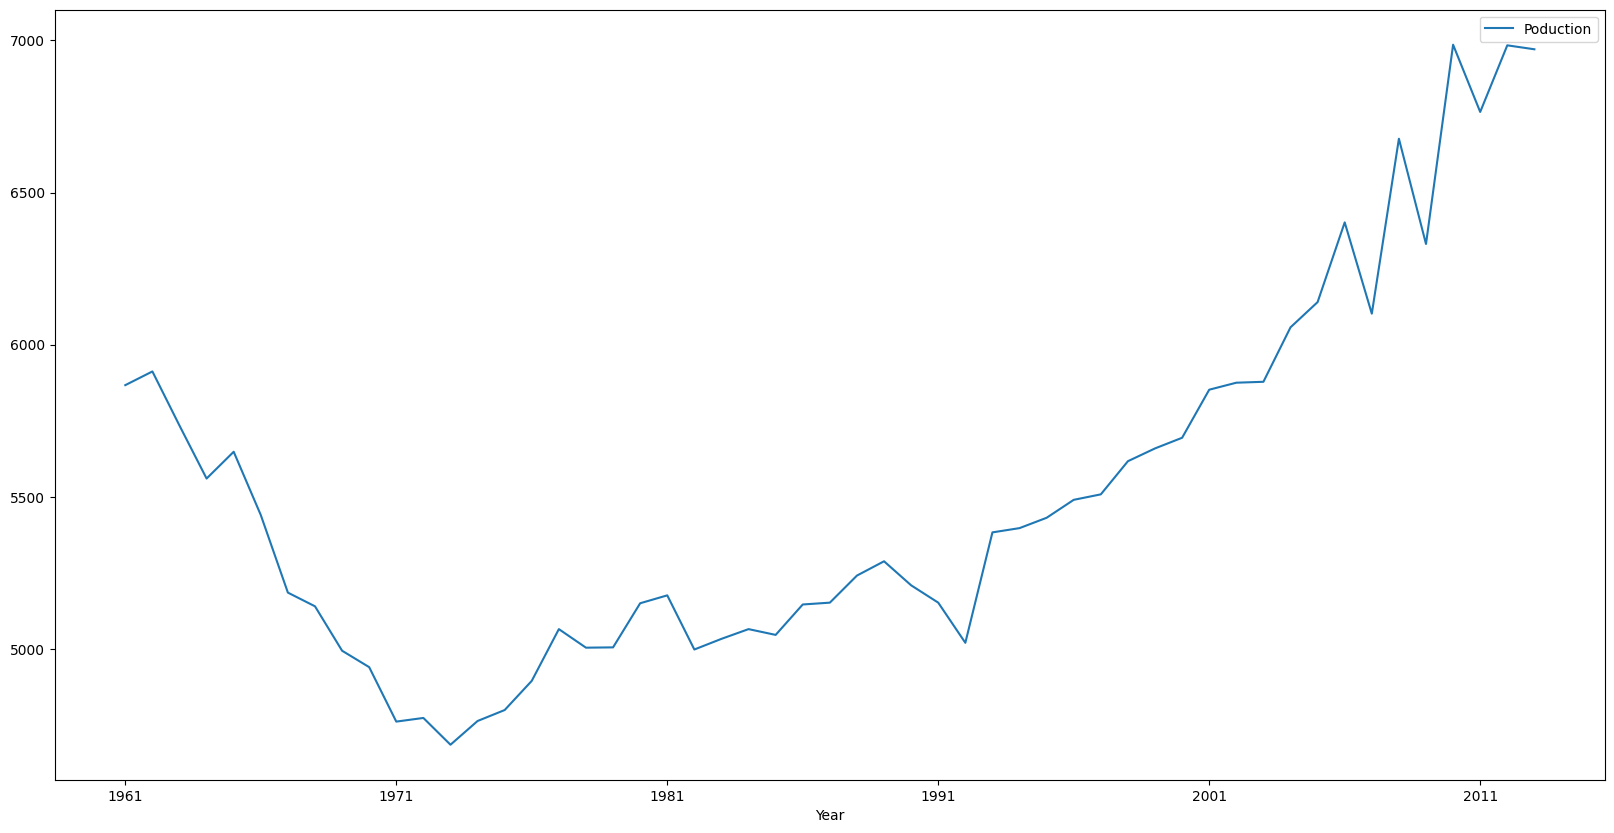

In [30]:
#affichage des courbes de tendances pour la France
France = df.loc[df['Area'] == 'France']
France = France.loc[France['Element'] == 'Food']
France = France.loc[France['Item'] == 'Wheat and products']
France = France.drop(['Area', 'Item', 'Element', 'Unit'], axis=1)
France = France.set_index('Year')
France.plot(figsize=(20, 10), label='France')
plt.show()